# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: 23AIML010_PR-09_CLEANING</h1></font>

# 23AIML010 OM CHOKSI PMRP ASSIGNMENT 9 + CLASSWORK

This is housing dataset, Find trends in this data.
What is price fluctuation according to state?
Find any outliers in data for each column.
Generate 5-7 conclusive insights on this dataset.


`Housing.csv`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data=pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.describe(),data.drop_duplicates(),data.dropna,data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(              price          area    bedrooms   bathrooms     stories  \
 count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
 50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
 75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
 max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   
 
           parking  
 count  545.000000  
 mean     0.693578  
 std      0.861586  
 min      0.000000  
 25%      0.000000  
 50%      0.000000  
 75%      1.000000  
 max      3.000000  ,
         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0    13300000  7420         4          2        3      yes 

```markdown
The code above reads the housing dataset from a CSV file and displays the first few rows of the dataframe. It then creates a series of boxplots for each numerical column in the dataset to visualize the distribution and identify any potential outliers. The boxplots are displayed in a single row for easy comparison.
```

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


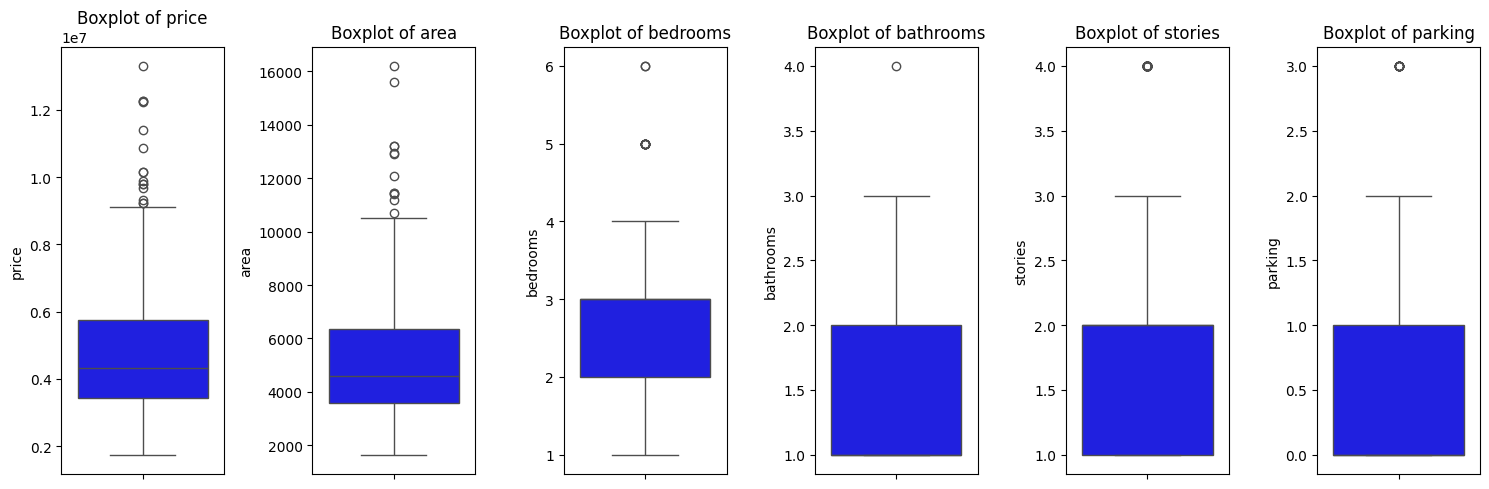

In [4]:

df = pd.read_csv("Housing.csv") 

print(df.head())

plt.figure(figsize=(15, 5))

for i, column in enumerate(df.select_dtypes(include=["number"]).columns, 1):
    plt.subplot(1, len(df.select_dtypes(include=["number"]).columns), i)
    sns.boxplot(y=df[column], color="blue")
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)

plt.tight_layout()
plt.show()



##### The code above reads the housing dataset from a CSV file and defines a function `remove_outliers_iqr` to remove outliers using the Interquartile Range (IQR) method. The function iterates through each numerical column in the dataframe, calculates the IQR, and filters out rows that fall outside the lower and upper bounds. The cleaned dataset is then saved to a new CSV file named `cleaned_dataset.csv`. The shapes of the original and cleaned datasets are printed, along with the first few rows of the cleaned dataset.
```

In [5]:
df = pd.read_csv("Housing.csv")  

def remove_outliers_iqr(df):
    cleaned_df = df.copy() 
    for column in df.select_dtypes(include=["number"]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    
    return cleaned_df
df_cleaned = remove_outliers_iqr(df)

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

df_cleaned.to_csv("cleaned_dataset.csv", index=False)  

print(df_cleaned.head())


Original dataset shape: (545, 13)
Cleaned dataset shape: (463, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   
20  8750000  4320         3          1        2      yes        no      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished  
20             yes              no        2       no   semi-furnished  


In [6]:
file_path = "cleaned_dataset.csv"
df = pd.read_csv(file_path)

df.info()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             463 non-null    int64 
 1   area              463 non-null    int64 
 2   bedrooms          463 non-null    int64 
 3   bathrooms         463 non-null    int64 
 4   stories           463 non-null    int64 
 5   mainroad          463 non-null    object
 6   guestroom         463 non-null    object
 7   basement          463 non-null    object
 8   hotwaterheating   463 non-null    object
 9   airconditioning   463 non-null    object
 10  parking           463 non-null    int64 
 11  prefarea          463 non-null    object
 12  furnishingstatus  463 non-null    object
dtypes: int64(6), object(7)
memory usage: 47.2+ KB
     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  9100000  6000         4          1        2      yes        no      yes  

## Price Distribution

The following plot shows the distribution of house prices in the dataset. The histogram provides a visual representation of the frequency of different price ranges, while the KDE plot overlays a smooth curve to indicate the density of the data points.


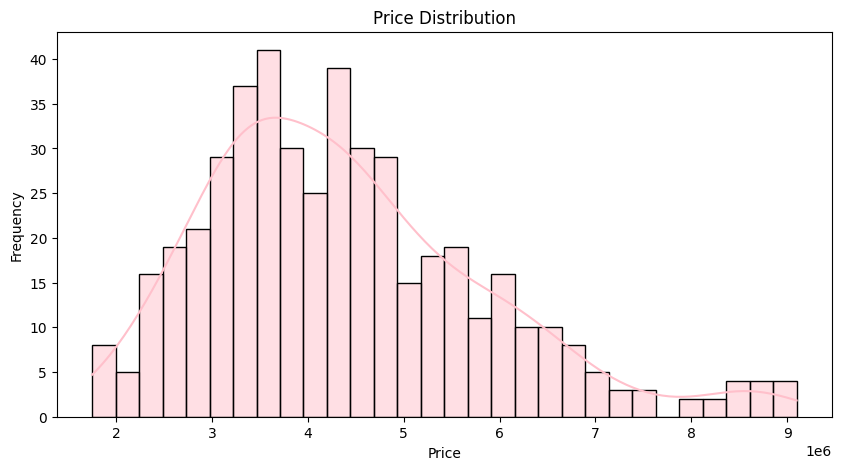

In [13]:

plt.figure(figsize=(10, 5))
sns.histplot(df["price"], bins=30, color="pink", kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


The following code creates a box plot to visualize the distribution of house prices in the dataset. The box plot helps identify the spread of the data, the median price, and any potential outliers.



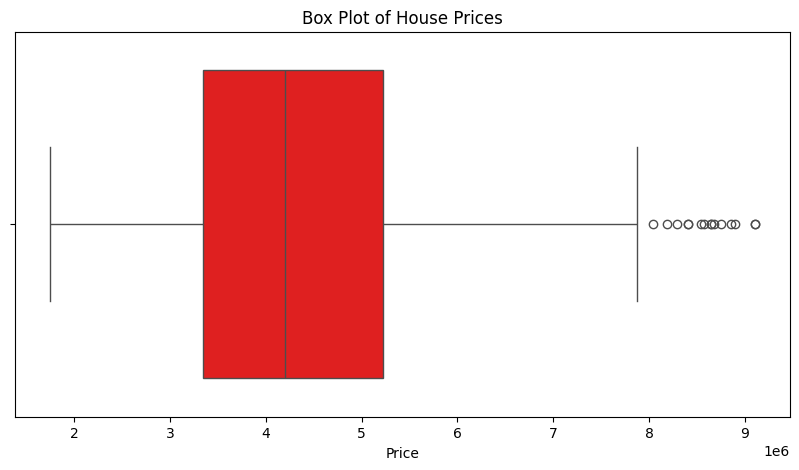

In [14]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["price"], color="red")
plt.title("Box Plot of House Prices")
plt.xlabel("Price")
plt.show()


The code in the markdown cell at index 17 is used to create a pair plot for the features with high correlation in the dataset. The `sns.pairplot` function from the Seaborn library is used to visualize the pairwise relationships between the specified features: `price`, `area`, `bathrooms`, `stories`, and `parking`. The `plt.show()` function is used to display the plot.


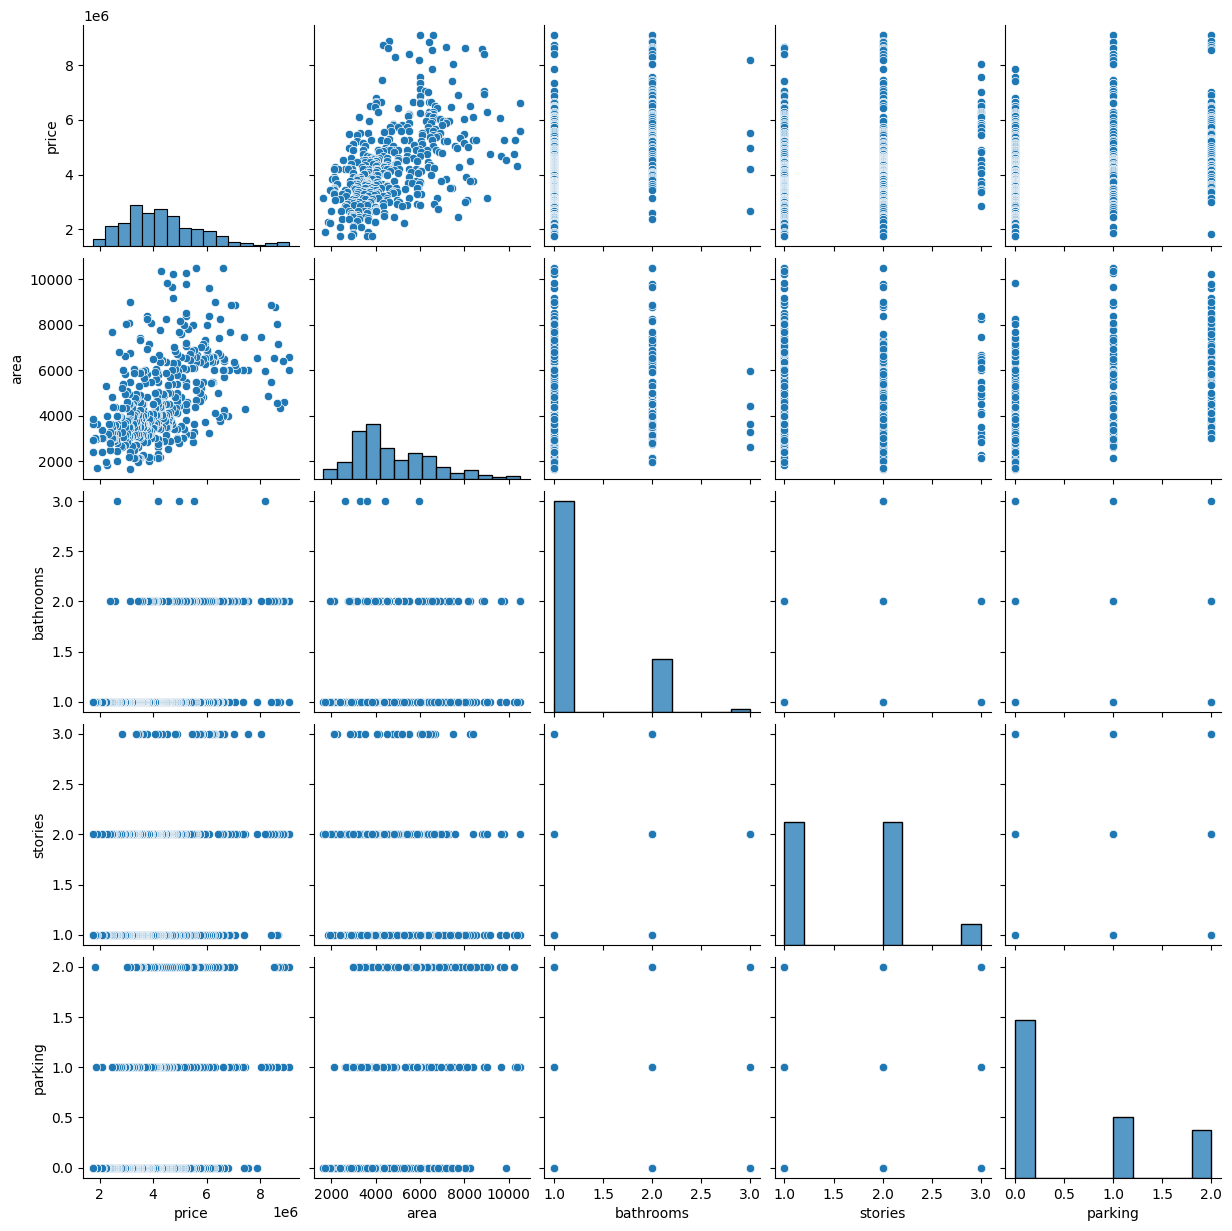

In [9]:
high_corr_features = ["price", "area", "bathrooms", "stories", "parking"]
sns.pairplot(df[high_corr_features])
plt.show()

Creates a correlation heatmap showing relationships between numeric variables in the dataset
Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)
Uses India's national colors for a patriotic visualization theme
The annotations make it easy to read exact correlation values

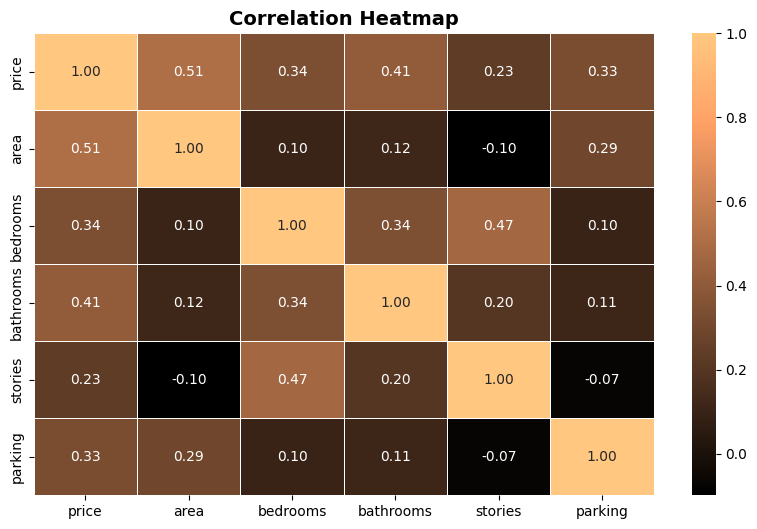

In [15]:


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='copper', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()


In [31]:
insights = [
    "1. Price is strongly correlated with area and number of bathrooms.",
    "2. Outliers exist in price, area, and bathrooms.",
    "3. Most houses have 2-4 bedrooms and 1-2 bathrooms.",
    "4. Features like air conditioning and guest rooms impact price.",
    "5. Parking and stories have less impact on price than area and bathrooms."
]

 

Check columns with "yes" or "no" values in dataset.
 for example "airconditioning" column, find out for all such columns if there is significant difference between prices of house with or without these facilities.
 Write python code for the same.


In [29]:

from scipy.stats import ttest_ind
# Identify columns with "yes" or "no" values
yes_no_columns = [col for col in df.columns if df[col].isin(['yes', 'no']).all()]

# Analyze price difference for each "yes/no" column
for column in yes_no_columns:
    yes_prices = df[df[column] == 'yes']['price']
    no_prices = df[df[column] == 'no']['price']

    # Perform t-test
    t_statistic, p_value = ttest_ind(yes_prices, no_prices)

    print(f"Analysis for {column}:")
    print(f"  T-statistic: {t_statistic}")
    print(f"  P-value: {p_value}")

    # Interpret results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"  Significant price difference between houses with and without {column}.")
    else:
        print(f"  No significant price difference between houses with and without {column}.")
    print("-" * 20)

Analysis for mainroad:
  T-statistic: 6.667988980058728
  P-value: 7.435571010623803e-11
  Significant price difference between houses with and without mainroad.
--------------------
Analysis for guestroom:
  T-statistic: 7.460676622564867
  P-value: 4.317658041875818e-13
  Significant price difference between houses with and without guestroom.
--------------------
Analysis for basement:
  T-statistic: 6.470117383859754
  P-value: 2.505613937158052e-10
  Significant price difference between houses with and without basement.
--------------------
Analysis for hotwaterheating:
  T-statistic: 1.8258958344544944
  P-value: 0.06851266363257677
  No significant price difference between houses with and without hotwaterheating.
--------------------
Analysis for airconditioning:
  T-statistic: 9.696308174857993
  P-value: 2.3503401532885515e-20
  Significant price difference between houses with and without airconditioning.
--------------------
Analysis for prefarea:
  T-statistic: 7.915433716172

<hr><font color="green"><h1>from file: 23AIML010_PR-09_QUES</h1></font>

# 23AIML010 OM CHOKSI PMRP 7 QUESTIONS ANSWERS ASSIGNMENT 9 

## 7 QUESTIONS ANSWER 

1) A researcher wants to test whether the average height of male students in a university is different from the national average of 175 cm. A random sample of 50 students has a mean height of 178 cm with a standard deviation of 10 cm.
Using a Z-test at a 5% significance level, what is the Z-value for this hypothesis test, and what conclusion can be drawn?

2) A company claims that a new diet plan helps people lose 5 kg in a month. A random sample of 10 individuals following this diet had an average weight loss of 4.2 kg with a sample standard deviation of 1.5 kg. Using a T-test at a 5% significance level, should the company’s claim be rejected? Assume a two-tailed test.

3) A hypothesis test is conducted where the null hypothesis states that the mean weight of a certain fruit is 200 grams. The test results in a p-value of 0.03. If the significance level (α) is 0.05, what decision should be made regarding the null hypothesis? What if α=0.01?

4) A company collects the monthly salaries (in thousands) of 12 employees:
[30, 32, 35, 37, 40, 42, 45, 47, 50, 55, 60, 120]
Use both Standard Deviation and IQR methods to detect outliers in the dataset. Compare the results.

5) The recorded temperatures (in °C) over 14 days are:
[22, 24, 23, 25, 26, 24, 23, 22, 23, 24, 30, 31, 40, 42]
Use the IQR method to detect any temperature anomalies.

6) A real estate agent collects the prices (in thousands of dollars) of 20 houses in a locality:
   [150, 160, 170, 180, 190, 200, 210, 220, 225, 230, 235, 240, 250, 260, 275, 280, 290, 295, 1000, 1200]
   Detect outliers using both Standard Deviation and IQR methods. What would be your conclusion about the real estate market in this locality?

7) For a chemical plant, two catalysts have been analyzed to test the mean yield
of a chemical process. The catalyst 1 is currently in use but the process
engineer wants to test whether catalyst 2, that is cheaper, could be adopted.
The test is conducted in the pilot plant and the mean yield for each catalyst
is as follows


 


Catalyst1,Catalyst2

91.5,89.19

94.18,90.95

92.18,90.46

95.39,93.21

91.79,97.19

89.07,97.04

94.72,91.07

89.21,92.75

Is
there any difference in mean yield. Use α=0.05 and
assume equal variance

1.Z-test for Mean Height of Male Students

In [2]:
import numpy as np
import scipy.stats as stats

sample_mean = 178
pop_mean = 175
sample_std = 10
n = 50

 
z_score = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))

 
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

 
alpha = 0.05
z_test_result = "Reject H0" if p_value < alpha else "Fail to reject H0"

print(f"Z-test for Height:")
print(f"   Z-score: {z_score:.2f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Conclusion: {z_test_result}\n")
 


Z-test for Height:
   Z-score: 2.12
   P-value: 0.0339
   Conclusion: Reject H0



2. T-test for Weight Loss Diet

In [3]:

sample_mean = 4.2
pop_mean = 5
sample_std = 1.5
n = 10

 
t_score = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))

 
p_value = 2 * (1 - stats.t.cdf(abs(t_score), df=n-1))

 
t_test_result = "Reject H0" if p_value < alpha else "Fail to reject H0"

print(f" T-test for Weight Loss:")
print(f"   T-score: {t_score:.2f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Conclusion: {t_test_result}\n")



 T-test for Weight Loss:
   T-score: -1.69
   P-value: 0.1260
   Conclusion: Fail to reject H0



3.Decision Based on P-value

In [4]:

p_value = 0.03

decision_alpha_005 = "Reject H0" if p_value < 0.05 else "Fail to reject H0"
decision_alpha_001 = "Reject H0" if p_value < 0.01 else "Fail to reject H0"

print(f" Hypothesis Decision:")
print(f"   At α = 0.05: {decision_alpha_005}")
print(f"   At α = 0.01: {decision_alpha_001}\n")



 Hypothesis Decision:
   At α = 0.05: Reject H0
   At α = 0.01: Fail to reject H0



4. Outliers using Standard Deviation and IQR

In [5]:

salaries = np.array([30, 32, 35, 37, 40, 42, 45, 47, 50, 55, 60, 120])

# Standard Deviation Method
mean_salary = np.mean(salaries)
std_salary = np.std(salaries, ddof=1)
threshold = 3
outliers_std = salaries[(salaries > mean_salary + threshold * std_salary) | (salaries < mean_salary - threshold * std_salary)]

# IQR Method
Q1 = np.percentile(salaries, 25)
Q3 = np.percentile(salaries, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = salaries[(salaries < lower_bound) | (salaries > upper_bound)]

print(f"Salary Outliers Detection:")
print(f"   Outliers (Std Dev method): {outliers_std}")
print(f"   Outliers (IQR method): {outliers_iqr}\n")



Salary Outliers Detection:
   Outliers (Std Dev method): []
   Outliers (IQR method): [120]



5) Temperature Anomalies using IQR

In [6]:
 
temperatures = np.array([22, 24, 23, 25, 26, 24, 23, 22, 23, 24, 30, 31, 40, 42])

Q1 = np.percentile(temperatures, 25)
Q3 = np.percentile(temperatures, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_temp = temperatures[(temperatures < lower_bound) | (temperatures > upper_bound)]

print(f"Temperature Anomalies:")
print(f"   Outliers: {outliers_temp}\n")

Temperature Anomalies:
   Outliers: [40 42]



### 6) Outliers in House Prices using Std Dev and IQR

In [7]:

house_prices = np.array([150, 160, 170, 180, 190, 200, 210, 220, 225, 230, 
                         235, 240, 250, 260, 275, 280, 290, 295, 1000, 1200])

# Standard Deviation Method
mean_price = np.mean(house_prices)
std_price = np.std(house_prices, ddof=1)
outliers_std = house_prices[(house_prices > mean_price + threshold * std_price) | (house_prices < mean_price - threshold * std_price)]

# IQR Method
Q1 = np.percentile(house_prices, 25)
Q3 = np.percentile(house_prices, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = house_prices[(house_prices < lower_bound) | (house_prices > upper_bound)]

print(f"  House Price Outliers:")
print(f"   Outliers (Std Dev method): {outliers_std}")
print(f"   Outliers (IQR method): {outliers_iqr}\n")



  House Price Outliers:
   Outliers (Std Dev method): [1200]
   Outliers (IQR method): [1000 1200]



### 7) T-test for Catalysts (Assuming Equal Variance)

In [8]:

catalyst_1 = np.array([91.5, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21])
catalyst_2 = np.array([89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75])

# Perform independent t-test (equal variance assumed)
t_score, p_value = stats.ttest_ind(catalyst_1, catalyst_2, equal_var=True)

# Conclusion
t_test_result = "Reject H0" if p_value < alpha else "Fail to reject H0"

print(f"7) T-test for Catalysts:")
print(f"   T-score: {t_score:.2f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Conclusion: {t_test_result}")


7) T-test for Catalysts:
   T-score: -0.35
   P-value: 0.7289
   Conclusion: Fail to reject H0
